In [48]:
from mc2hessian import (LocalPDF, XGrid, Flavors, invcov_sqrtinvcov,
                        comp_hess, DEFAULT_EPSILON, make_grid)
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import palettable
cm = palettable.colorbrewer.diverging.Spectral_11_r.mpl_colormap
plt.rcParams['figure.figsize'] = (16,9)

In [2]:
fl = Flavors()
xgrid = XGrid()
pdf = LocalPDF('1000rep', 1000, xgrid, fl, 1, eps=0.25)
index = pdf.fin
indextmp = np.copy(index)
nx = xgrid.n
nf = fl.n

# build covmat
cov = pdf.pdfcovmat()
invcov, sqrtinvcov = invcov_sqrtinvcov(cov)

 [Info] Keeping  242 nf*nx using (1-std/68cl) <= eps = 0.25
 [Warning] Removing eigenvalue 0 -3.86149087968e-17
 [Warning] Removing eigenvalue 1 -1.64385511927e-17
 [Warning] Removing eigenvalue 2 -7.30146553535e-18
 [Warning] Removing eigenvalue 3 -1.44691652489e-18
 [Warning] Removing eigenvalue 4 -6.0694333774e-20
 [Warning] Removing eigenvalue 5 -5.23455499837e-20
 [Warning] Removing eigenvalue 6 -2.51740134208e-20
 [Warning] Removing eigenvalue 7 -2.00074305352e-20
 [Warning] Removing eigenvalue 8 -1.87149532612e-20
 [Warning] Removing eigenvalue 9 -1.29993910382e-20
 [Warning] Removing eigenvalue 10 -6.55177987523e-21
 [Warning] Removing eigenvalue 11 -6.41854418732e-21
 [Warning] Removing eigenvalue 12 -5.84692989199e-21
 [Warning] Removing eigenvalue 13 -3.73270188283e-21
 [Warning] Removing eigenvalue 14 -3.68073857631e-21
 [Warning] Removing eigenvalue 15 -3.35165574958e-21
 [Warning] Removing eigenvalue 16 -3.23910617033e-21
 [Warning] Removing eigenvalue 17 -2.95734913243e-

Compute eigendecomposition of the covariance matrix
===================

Eigenvalues smaller that 1e-8 are only numerical noise

In [7]:
vals, vects = la.eigh(cov)
mask = vals>1e-8
vals = vals[mask]
vects = vects[:,mask]
np.allclose(np.dot(vects, np.dot(np.diag(vals), vects.T)), cov)

True

Compute smaller covariance matrix
---------------------------------

Demanding eigenvalues greater than 1e-4 we obtain 59 eigenvectors

In [33]:
minimask = vals>1e-4
minivals = vals[minimask]
minivects = vects[:,minimask]
minicov = np.dot(minivects, np.dot(np.diag(minivals), minivects.T))
Neig = minivects.shape[1]

In [34]:
minivects.shape

(350, 59)

In [35]:
C = np.dot(minivects, np.diag((minivals*(Neig-1))**0.5))

In [36]:
np.allclose(np.dot(C,C.T)/(Neig-1), minicov)

True

Reduced covariance matrix
-------------------------

<matplotlib.colorbar.Colorbar instance at 0x7fcb04289248>

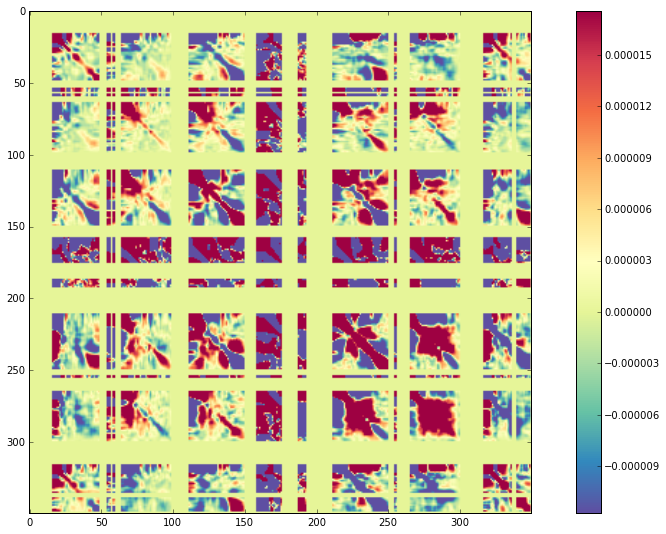

In [38]:
plt.set_cmap(cm)
plt.imshow(np.cov(x), vmax=np.percentile(np.cov(x),90),vmin=np.percentile(np.cov(x),10))
plt.colorbar()

Original NNPDF covariance matrix
--------------------------------

<matplotlib.colorbar.Colorbar instance at 0x7fcb02720b48>

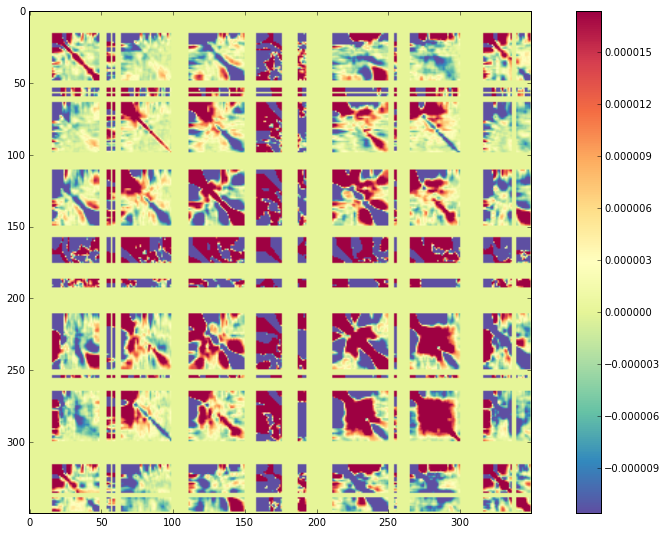

In [40]:
plt.set_cmap(cm)
plt.imshow(cov, vmax=np.percentile(cov,90),vmin=np.percentile(cov,10))
plt.colorbar()

Compute parameter covariance matrix
--------------------

In [80]:
cova = np.cov(x.T)
vals, vecs = la.eigh(cova)
for val, vec in zip(vals, vecs):
    vec *= np.sqrt(val)

In [82]:
make_grid(pdf, '1000rep', Neig, vecs)


- Exporting new grid: 1000rep_hessian_59
 -> Writing replica 0
 [Done]
 -> Writing replica 1
 -> Writing replica 2
 -> Writing replica 3
 -> Writing replica 4
 -> Writing replica -> Writing replica -> Writing replica -> Writing replica 5
 6
 7
 8
 -> Writing replica -> Writing replica -> Writing replica -> Writing replica 9
 10
 11
 12
 -> Writing replica -> Writing replica -> Writing replica -> Writing replica 13
 14
 15
 16
 -> Writing replica -> Writing replica -> Writing replica -> Writing replica 17
 18
 20
 19
 -> Writing replica -> Writing replica -> Writing replica -> Writing replica 21
 22
 24
 23
 -> Writing replica -> Writing replica -> Writing replica -> Writing replica 25
 26
 28
 27
 -> Writing replica -> Writing replica -> Writing replica -> Writing replica 29
 30
 32
 31
 -> Writing replica -> Writing replica -> Writing replica -> Writing replica 33
 34
 36
 35
 -> Writing replica -> Writing replica -> Writing replica -> Writing replica 37
 38
 40
 39
 -> Writing repli